In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# **Importez les données :**

In [3]:
df = pd.read_csv('earthquakes.csv') 
pd.set_option('display.max_columns', None)
df

,id,magnitude,type,title,date,time,updated,url,detailUrl,felt,cdi,mmi,alert,status,tsunami,sig,net,code,ids,sources,types,nst,dmin,rms,gap,magType,geometryType,depth,latitude,longitude,place,distanceKM,placeOnly,location,continent,country,subnational,city,locality,postcode,what3words,timezone,locationDetails
0,us7000necw,4.8,earthquake,"M 4.8 - 33 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182289,1726583895255,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1893,6,5,green,reviewed,0,994,us,7000necw,",us7000necw,tx2024shcj,",",us,tx,",",dyfi,ground-failure,losspager,moment-tensor,o...",37,0.28700,0.48,70.0,mww,Point,4.0440,32.3984,-102.0440,"33 km WSW of Ackerly, Texas",33,"WSW of Ackerly, Texas","Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79783.0,landmass.perkily.affords,-300,"[{'id': '80684', 'wikidataId': '', 'name': '79..."
1,tx2024shcj,5.1,earthquake,"M 5.1 - 34 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182183,1726672002991,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,2042,6,5,green,reviewed,0,1040,tx,2024shcj,",us7000necw,tx2024shcj,",",us,tx,",",dyfi,ground-failure,losspager,moment-tensor,o...",24,0.00000,0.10,38.0,ml,Point,6.1279,32.4140,-102.0570,"34 km WSW of Ackerly, Texas",34,"WSW of Ackerly, Texas","Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79331.0,escalator.grownups.dwell,-300,"[{'id': '89341', 'wikidataId': '', 'name': '48..."
2,ci40734823,3.7,earthquake,"M 3.7 - 6 km N of Malibu, CA",2024-09-16T11:22:08,1726485728190,1726637414586,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,1580,4,4,NaN,reviewed,0,591,ci,40734823,",ci40734823,us7000ne83,",",ci,us,",",dyfi,focal-mechanism,nearby-cities,origin,pha...",135,0.03294,0.28,99.0,ml,Point,10.9000,34.0678,-118.8070,"6 km N of Malibu, CA",6,"N of Malibu, CA","Malibu, CA",North America,United States of America (the),California,Los Angeles,Agoura Hills-Malibu,90265.0,clocking.uploaded.issuer,-420,"[{'id': '93478', 'wikidataId': 'Q844837', 'nam..."
3,tx2024scvz,3.9,earthquake,"M 3.9 - 58 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266539,1726584426218,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,5,3,4,green,reviewed,0,236,tx,2024scvz,",us7000ndte,tx2024scvz,",",us,tx,",",dyfi,losspager,moment-tensor,origin,phase-dat...",38,0.00000,0.10,65.0,ml,Point,6.2024,31.6470,-104.4500,"58 km S of Whites City, New Mexico",58,"S of Whites City, New Mexico","Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,sailboats.sawn.speeding,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."
4,us7000ndte,4.1,earthquake,"M 4.1 - 60 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266382,1726334616179,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,4,3,4,green,reviewed,0,260,us,7000ndte,",us7000ndte,",",us,",",dyfi,losspager,origin,phase-data,shakemap,",28,0.04300,0.26,67.0,mb,Point,8.8140,31.6323,-104.4730,"60 km S of Whites City, New Mexico",60,"S of Whites City, New Mexico","Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,spinners.downtime.computes,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,us6000ldpm,6.3,earthquake,"M 6.3 - 25 km NNE of Zindah Jān, Afghanistan",2023-10-07T07:12:49,1696662769702,1702589215040,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,11,9,8,orange,reviewed,0,1010,us,6000ldpm,",us6000ldpm,usauto6000ldpm,at00s25ddi,

# **Nettoyez Les données :** 

In [4]:
# Supprimons les colonnes inutiles :
df.drop(['id', 'url', 'detailUrl', 'locationDetails', 'what3words', 'geometryType', 
                'net', 'code', 'sources', 'ids', 'magType', 'geometryType','title'      ],
           axis=1, inplace=True)
df

,magnitude,type,date,time,updated,felt,cdi,mmi,alert,status,tsunami,sig,types,nst,dmin,rms,gap,depth,latitude,longitude,place,distanceKM,placeOnly,location,continent,country,subnational,city,locality,postcode,timezone
0,4.8,earthquake,2024-09-17T00:49:42,1726534182289,1726583895255,1893,6,5,green,reviewed,0,994,",dyfi,ground-failure,losspager,moment-tensor,o...",37,0.28700,0.48,70.0,4.0440,32.3984,-102.0440,"33 km WSW of Ackerly, Texas",33,"WSW of Ackerly, Texas","Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79783.0,-300
1,5.1,earthquake,2024-09-17T00:49:42,1726534182183,1726672002991,2042,6,5,green,reviewed,0,1040,",dyfi,ground-failure,losspager,moment-tensor,o...",24,0.00000,0.10,38.0,6.1279,32.4140,-102.0570,"34 km WSW of Ackerly, Texas",34,"WSW of Ackerly, Texas","Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79331.0,-300
2,3.7,earthquake,2024-09-16T11:22:08,1726485728190,1726637414586,1580,4,4,NaN,reviewed,0,591,",dyfi,focal-mechanism,nearby-cities,origin,pha...",135,0.03294,0.28,99.0,10.9000,34.0678,-118.8070,"6 km N of Malibu, CA",6,"N of Malibu, CA","Malibu, CA",North America,United States of America (the),California,Los Angeles,Agoura Hills-Malibu,90265.0,-420
3,3.9,earthquake,2024-09-14T17:01:06,1726333266539,1726584426218,5,3,4,green,reviewed,0,236,",dyfi,losspager,moment-tensor,origin,phase-dat...",38,0.00000,0.10,65.0,6.2024,31.6470,-104.4500,"58 km S of Whites City, New Mexico",58,"S of Whites City, New Mexico","Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,-300
4,4.1,earthquake,2024-09-14T17:01:06,1726333266382,1726334616179,4,3,4,green,reviewed,0,260,",dyfi,losspager,origin,phase-data,shakemap,",28,0.04300,0.26,67.0,8.8140,31.6323,-104.4730,"60 km S of Whites City, New Mexico",60,"S of Whites City, New Mexico","Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,-300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,6.3,earthquake,2023-10-07T07:12:49,1696662769702,1702589215040,11,9,8,orange,reviewed,0,1010,",dyfi,general-text,ground-failure,impact-text,...",244,5.90400,0.50,43.0,8.0000,34.5492,61.8840,"25 km NNE of Zindah Jān, Afghanistan",25,"NNE of Zindah Jān, Afghanistan","Zindah Jān, Afghanistan",Asia,Afghanistan,Herat,Zindah Jan,Zendeh Jan District,NaN,270
1133,5.4,earthquake,2023-10-07T06:49:41,1696661381156,1702589215040,0,0,7,yellow,reviewed,0,650,",ground-failure,losspager,origin,phase-data,sh...",165,5.85800,0.47,54.0,10.2570,34.5414,61.9547,"26 km NE of Zindah Jān, Afghanistan",26,"NE of Zindah Jān, Afghanistan","Zindah Jān, Afghanistan",Asia,Afghanistan,Herat,Zindah Jan,Zendeh Jan District,NaN,270
1134,6.3,earthquake,2023-10-07T06:41:03,1696660863327,1702589215040,19,8,8,orange,reviewed,0,1014,",dyfi,general-text,ground-failure,impact-text,...",279,5.87200,0.58,43.0,14.0000,34.6259,61.9260,"32 km NNE of Zindah Jān, Afghanistan",32,"NNE of Zindah Jān, Afghanistan","Zindah Jān, Afghanistan",Asia,Afghanistan,Herat,Zindah Jan,Zendeh Jan District,NaN,270
1135,5.7,earthquake,2023-10-03T09:21:03,1696324863018,1702589211040,131,8,7,green,reviewed,0,605,",dyfi,ground-failure,impact-text,internal-mome...",226,3.93000,0.33,23.0,13.0000,29.5163,81.2118,"39 km NE of Dipayal, Nepal",39,"NE of Dipayal, Nepal","Dipayal, Nepal",Asia,Nepal,Sudurpashchim,Jayaprithivi,JayaPrithvi-03,NaN,345


# **Analysez Les donneés :**

### **Quelle est la moyenne des magnitudes dans le dataset :**

In [5]:
moy = round(df["magnitude"].mean(),2)
print('La moyenne des magnitudes est de',moy)

La moyenne des magnitudes est de 4.86


### **Quelle est la magnitude maximale enregistrée**:

In [6]:
max = df["magnitude"].max()
print(f'La magnitude maximale est de {max}')

La magnitude maximale est de 7.6


### **Combien d’événements ont une magnitude supérieure à 5 :**

In [7]:
plus_que_5 = (df['magnitude'] > 5).sum()
print(f'Nombre d’événements avec une magnitude supérieure à 5 : {plus_que_5}')

Nombre d’événements avec une magnitude supérieure à 5 : 639


### **Quelle est la profondeur moyenne des épicentres :**

In [8]:
profond_moy = round(df['depth'].mean(), 2)
print(f'La profondeur moyenne des épicentres est de {profond_moy} km')


La profondeur moyenne des épicentres est de 41.29 km


### **Quelle est la région ayant enregistré le plus d’événements:**

In [9]:
most = df['place'].value_counts().idxmax()
print(f'Le lieu où il y a eu le plus de événements est {most}')

Le lieu où il y a eu le plus de événements est Izu Islands, Japan region


### **Combien d’événements ont été ressentis par la population :**

In [10]:
print(f'Nombre de événements ont été ressentis par la population : {df["felt"].count()}')

Nombre de événements ont été ressentis par la population : 1137


### **Quelle est la distribution des magnitudes (par intervalles) :**

[3.   3.46 3.92 4.38 4.84 5.3  5.76 6.22 6.68 7.14 7.6 ]


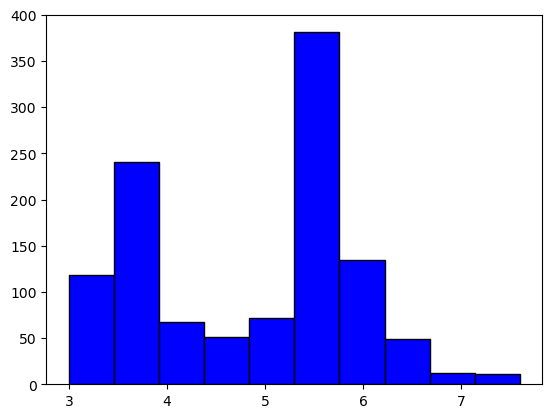

In [11]:
n,bin,patch = plt.hist(df['magnitude'], bins=10, color='blue', edgecolor='black')
print(bin)

### **Quel pourcentage des événements ont provoqué un tsunami :**

In [12]:
tsunami_count = df['tsunami'].sum()
total_events = len(df)
tsunami_percentage = (tsunami_count / total_events) * 100
print(f'Le pourcentage des événements qui ont provoqué un tsunami est de {tsunami_percentage} %')

Le pourcentage des événements qui ont provoqué un tsunami est de 5.980650835532102 %


### **Quelle est la profondeur minimale enregistrée :**

In [13]:
print(f'la profondeur minimal est de {df["depth"].min()} km')

la profondeur minimal est de -0.25 km


### **Quel est l’écart type des magnitudes:**

In [14]:
print(f'l"écarts type de la magnitude est de {np.std(df["magnitude"])}')

l"écarts type de la magnitude est de 1.0473790353370136


### **Quels sont les 5 pays ayant le plus d’événements:**

In [15]:
df.groupby('country')['country'].count().sort_values(ascending=False).head(5).reset_index(name='count')

,country,count
0,United States of America (the),423
1,Japan,68
2,Taiwan (Province of China),55
3,Indonesia,38
4,China,30


### **Combien d’événements ont une intensité Mercalli (mmi) supérieure à 6 :**

In [16]:
print(f"Nombre d’événements avec une intensité Mercalli supérieure à 6 : {(df['mmi'] > 6).sum() }")

Nombre d’événements avec une intensité Mercalli supérieure à 6 : 116


### **Quelle est la fréquence des alertes de type rouge :**

In [17]:
red_alerts = (df['alert'] == 'red').sum()
print(f'La fréquence des alertes de type rouge est de {red_alerts}')

La fréquence des alertes de type rouge est de 9


### **Quelle est la médiane des profondeurs des épicentres :**

In [18]:
median_depth = df['depth'].median()
print(f'La médiane des profondeurs des épicentres est de {median_depth} km')

La médiane des profondeurs des épicentres est de 10.0 km


### **Combien d’événements se trouvent dans chaque continent :**

In [19]:
events_per_continent = df['continent'].value_counts().reset_index()
events_per_continent

,continent,count
0,North America,446
1,Asia,333
2,South America,75
3,Europe,7
4,Africa,3
5,Insular Oceania,1
6,Insluar Oceania,1
7,Oceania,1


### **Quelle est la moyenne des distances par rapport aux localités :**

In [21]:
moy_distance = round(df['distanceKM'].mean(), 2)
print(f'La moyenne des distances par rapport aux localités est de {moy_distance} km')

La moyenne des distances par rapport aux localités est de 52.29 km


### **Combien de fois chaque type d’événement (type) apparaît-il :**

In [22]:
event_type_counts = df['type'].count()
print(f'Le type d’événement apparaissant {event_type_counts} fois .')


Le type d’événement apparaissant 1137 fois .


### **Quelle est la valeur maximale de l’angle de couverture (gap) :**

In [23]:
max_gap = df['gap'].max()
print(f'La valeur maximale de l’angle de couverture (gap) est de {max_gap}')

La valeur maximale de l’angle de couverture (gap) est de 256.0


### **Quel est le nombre total de stations ayant détecté les événements (nst) :**

In [24]:
total_stations = df['nst'].sum()
print(f'Le nombre total de stations ayant détecté les événements est de {total_stations}')

Le nombre total de stations ayant détecté les événements est de 130862


### **Quelle est la répartition des événements par année :**

In [25]:
df['year'] = pd.to_datetime(df['date']).dt.year
events_per_year = df['year'].value_counts().sort_index()
events_per_year

year
2023    317
2024    820
Name: count, dtype: int64

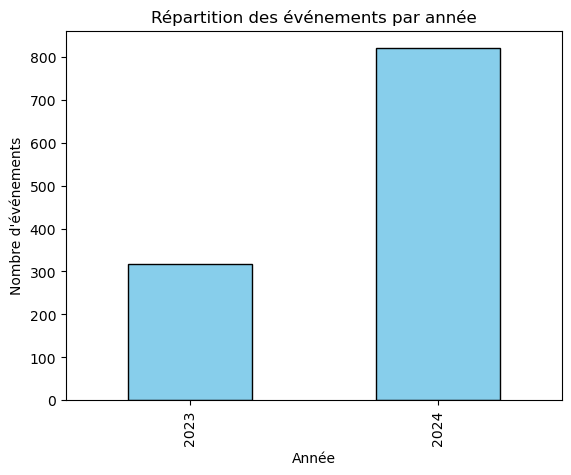

In [26]:
# Histogram
events_per_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Répartition des événements par année')
plt.xlabel('Année')
plt.ylabel('Nombre d\'événements')
plt.show()

### **Combien de fois chaque fuseau horaire (timezone) est mentionné :**

In [27]:
timezone_counts = df['timezone'].value_counts()
print(timezone_counts)

timezone
-300    214
 540    194
 480    183
-420    141
-360     81
-180     47
 600     43
-660     36
 270     26
-480     25
-540     24
 420     22
 180     17
-240     17
-720     14
 210     11
 60       7
 345      6
 360      5
-600      5
 720      5
 330      3
 390      3
 300      3
-60       2
 780      1
 120      1
-120      1
Name: count, dtype: int64


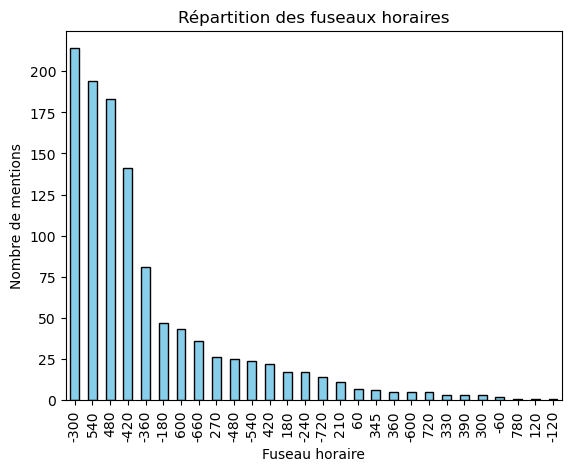

In [28]:
# Bar chart
timezone_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Répartition des fuseaux horaires')
plt.xlabel('Fuseau horaire')
plt.ylabel('Nombre de mentions')
plt.show()

### **Quelle est la valeur médiane des distances (dmin) des stations à l’épicentre :**

In [29]:
median_dmin = df['dmin'].median()
print(f'La valeur médiane des distances (dmin) des stations à l’épicentre est de {median_dmin}')

La valeur médiane des distances (dmin) des stations à l’épicentre est de 0.68


### **Quelle est la magnitude minimale enregistrée pour chaque continent :**

In [71]:
min_magnitude_per_continent = df.groupby('continent')['magnitude'].min().sort_values().reset_index(name='min_magnitude')
min_magnitude_per_continent

,continent,min_magnitude
0,North America,3.0
1,Asia,4.8
2,Insular Oceania,4.9
3,Insluar Oceania,5.1
4,Africa,5.2
5,South America,5.3
6,Europe,5.4
7,Oceania,5.5


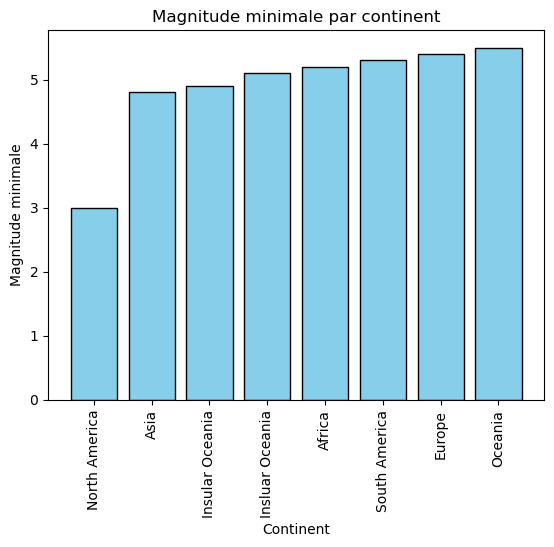

In [79]:
# Bar chart for minimum magnitude per continent
plt.bar(min_magnitude_per_continent['continent'],min_magnitude_per_continent['min_magnitude'],color='skyblue', edgecolor='black')
plt.title('Magnitude minimale par continent')
plt.xlabel('Continent')
plt.ylabel('Magnitude minimale')
plt.xticks(rotation=90)
plt.show()

### **Combien d’événements ont une importance (sig) supérieure à 900 :**

In [32]:
events_sig_gt_900 = (df['sig'] > 900).sum()
print(f"Nombre d’événements avec une importance (sig) supérieure à 900 : {events_sig_gt_900}")

Nombre d’événements avec une importance (sig) supérieure à 900 : 45


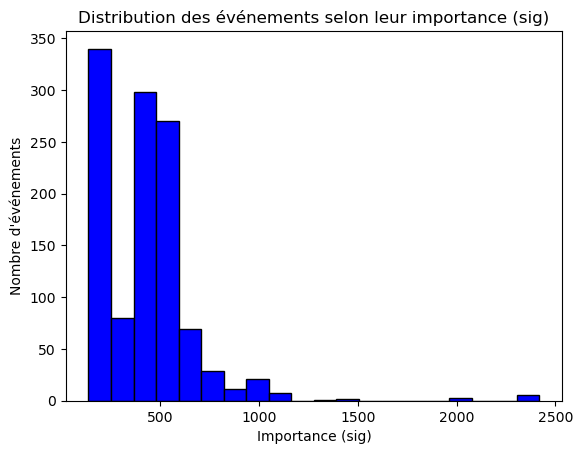

In [33]:
# Histogramme : Comparer la distribution des événements selon leur importance (sig)
plt.hist(df['sig'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution des événements selon leur importance (sig)')
plt.xlabel('Importance (sig)')
plt.ylabel('Nombre d\'événements')
plt.show()

### **Quelle est la distribution des alertes par couleur :**

In [34]:
alert_distribution = df['alert'].value_counts().reset_index()
alert_distribution

,alert,count
0,green,711
1,yellow,38
2,red,9
3,orange,6


## Combien d’événements ont une profondeur inférieure à 10 km

In [35]:
events_depth_lt_10 = (df['depth'] < 10).sum()
print(f'Nombre d’événements avec une profondeur inférieure à 10 km : {events_depth_lt_10}')

Nombre d’événements avec une profondeur inférieure à 10 km : 396


## Quelle est la variance des magnitudes dans le dataset 

In [36]:
variance_magnitude = df['magnitude'].var()
print(f'La variance des magnitudes dans le dataset est de {variance_magnitude}')

La variance des magnitudes dans le dataset est de 1.0979685151808025


## Combien d’événements se situent à une latitude supérieure à 30° 

In [37]:
events_lat_gt_30 = (df['latitude'] > 30).sum()
print(f'Nombre d’événements avec une latitude supérieure à 30° : {events_lat_gt_30}')

Nombre d’événements avec une latitude supérieure à 30° : 728


## Quels sont les 10 événements les plus significatifs selon sig 

In [38]:
top_10_significant_events = df.sort_values(by='sig', ascending=False).head(10)
top_10_significant_events

,magnitude,type,date,time,updated,felt,cdi,mmi,alert,status,tsunami,sig,types,nst,dmin,rms,gap,depth,latitude,longitude,place,distanceKM,placeOnly,location,continent,country,subnational,city,locality,postcode,timezone,year
1119,7.0,earthquake,2024-01-22T18:09:04,1705946944340,1720824023702,482,9,9,red,reviewed,0,2419,",dyfi,finite-fault,general-text,ground-failure...",121,0.428,0.64,29.0,13.0,41.2938,78.5937,"128 km WNW of Aykol, China",128,"WNW of Aykol, China","Aykol, China",Asia,China,Xinjiang Uyghur Autonomous Region,Wushi,Wushi,NaN,480,2024
117,7.0,earthquake,2024-01-22T18:09:04,1705946944340,1720824023702,482,9,9,red,reviewed,0,2419,",dyfi,finite-fault,general-text,ground-failure...",121,0.428,0.64,29.0,13.0,41.2938,78.5937,"128 km WNW of Aykol, China",128,"WNW of Aykol, China","Aykol, China",Asia,China,Xinjiang Uyghur Autonomous Region,Wushi,Wushi,NaN,480,2024
526,7.5,earthquake,2024-01-01T07:10:09,1704093009476,1724334238040,413,9,9,red,reviewed,1,2368,",dyfi,earthquake-name,finite-fault,general-tex...",282,0.957,0.55,36.0,10.0,37.4976,137.2420,"2024 Noto Peninsula, Japan Earthquake",0,"2024 Noto Peninsula, Japan Earthquake","2024 Noto Peninsula, Japan Earthquake",Asia,Japan,Ishikawa,Suzu,Noto Peninsula,NaN,540,2024
181,7.5,earthquake,2024-01-01T07:10:09,1704093009476,1724334238040,413,9,9,red,reviewed,1,2368,",dyfi,earthquake-name,finite-fault,general-tex...",282,0.957,0.55,36.0,10.0,37.4976,137.2420,"2024 Noto Peninsula, Japan Earthquake",0,"2024 Noto Peninsula, Japan Earthquake","2024 Noto Peninsula, Japan Earthquake",Asia,Japan,Ishikawa,Suzu,Noto Peninsula,NaN,540,2024
1009,7.5,earthquake,2024-01-01T07:10:09,1704093009476,1724334238040,413,9,9,red,reviewed,1,2368,",dyfi,earthquake-name,finite-fault,general-tex...",282,0.957,0.55,36.0,10.0,37.4976,137.2420,"2024 Noto Peninsula, Japan Earthquake",0,"2024 Noto Peninsula, Japan Earthquake","2024 Noto Peninsula, Japan Earthquake",Asia,Japan,Ishikawa,Suzu,Noto Peninsula,NaN,540,2024
791,7.5,earthquake,2024-01-01T07:10:09,1704093009476,1724334238040,413,9,9,red,reviewed,1,2368,",dyfi,earthquake-name,finite-fault,general-tex...",282,0.957,0.55,36.0,10.0,37.4976,137.2420,"2024 Noto Peninsula, Japan Earthquake",0,"2024 Noto Peninsula, Japan Earthquake","2024 Noto Peninsula, Japan Earthquake",Asia,Japan,Ishikawa,Suzu,Noto Peninsula,NaN,540,2024
1037,5.4,earthquake,2023-08-05T18:33:59,1691260439457,1701600845856,48,9,7,red,reviewed,0,2044,",dyfi,ground-failure,impact-text,internal-mome...",199,2.789,0.65,27.0,18.0,37.1933,116.3810,"24 km S of Dezhou, China",24,"S of Dezhou, China","Dezhou, China",Asia,China,Shandong Sheng,Pingyuan,Pingyuan,NaN,480,2023
489,6.3,earthquake,2023-10-11T00:41:55,1696984915908,1702764786040,54,7,8,red,reviewed,0,2037,",dyfi,general-text,ground-failure,impact-text,...",423,4.645,0.70,21.0,8.0,34.5798,62.0717,"24 km NNW of Herāt, Afghanistan",24,"NNW of Herāt, Afghanistan","Herāt, Afghanistan",Asia,Afghanistan,Herat,Herat,Injil District,NaN,270,2023
1130,6.3,earthquake,2023-10-11T00:41:55,1696984915908,1702764786040,54,7,8,red,reviewed,0,2037,",dyfi,general-text,ground-failure,impact-text,...",423,4.645,0.70,21.0,8.0,34.5798,62.0717,"24 km NNW of Herāt, Afghanistan",24,"NNW of Herāt, Afghanistan","Herāt, Afghanistan",Asia,Afghanistan,Herat,Herat,Injil District,NaN,270,2023
169,7.4,earthquake,2024-04-02T23:58:12,1712102292173,1726487948843,638,9,8,yellow,reviewed,1,1423,",associate,dyfi,finite-fault,general-link,gene...",322,0.337,0.93,17.0,40.0,23.8190,121.5620,"15 km S of Hualien City, Taiwan",15,"S of Hualien City, Taiwan","Hualien City, Taiwan",Asia,Taiwan (Province of China),Hualien,Shoufeng,Shuilian Village,NaN,480,2024


##	Quel est le pays ayant le plus d’événements avec une intensité Mercalli supérieure à 5 

In [39]:
 
events_mmi_gt_5 = df[df['mmi'] > 5]
country_most_events_mmi_gt_5 = events_mmi_gt_5['country'].value_counts().idxmax()

print(f'Le pays ayant le plus d’événements avec une intensité Mercalli supérieure à 5 est {country_most_events_mmi_gt_5}')

Le pays ayant le plus d’événements avec une intensité Mercalli supérieure à 5 est Japan


##	Les événements plus profonds sont-ils associés à des magnitudes plus élevées 

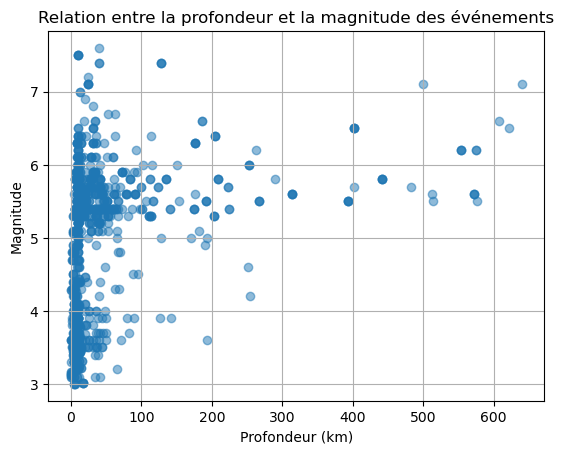

In [40]:
plt.scatter(df['depth'], df['magnitude'], alpha=0.5)
plt.title('Relation entre la profondeur et la magnitude des événements')
plt.xlabel('Profondeur (km)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

##	Existe-t-il une corrélation entre la profondeur et la magnitude 

In [41]:
correlation = df['depth'].corr(df['magnitude'])
print(f'La corrélation entre la profondeur et la magnitude est de {correlation}')

La corrélation entre la profondeur et la magnitude est de 0.3100342682918096


##	Quels continents enregistrent les magnitudes les plus élevées en moyenne 

In [42]:
mean_magnitude_per_continent = df.groupby('continent')['magnitude'].mean().reset_index(name='mean_magnitude')
mean_magnitude_per_continent.sort_values(by='mean_magnitude', ascending=False, inplace=True)
print(mean_magnitude_per_continent)

         continent  mean_magnitude
7    South America        5.804000
1             Asia        5.689189
2           Europe        5.571429
6          Oceania        5.500000
0           Africa        5.366667
3  Insluar Oceania        5.100000
4  Insular Oceania        4.900000
5    North America        3.825964


##	Les événements ressentis par la population ont-ils des magnitudes plus élevées 

In [43]:
 
events_felt = df[df['felt'] > 0]
events_not_felt = df[df['felt'] == 0]

 
mean_magnitude_felt = events_felt['magnitude'].mean()
mean_magnitude_not_felt = events_not_felt['magnitude'].mean()

print(f'La magnitude moyenne des événements ressentis par la population est de {mean_magnitude_felt}')
print(f'La magnitude moyenne des événements non ressentis par la population est de {mean_magnitude_not_felt}')

La magnitude moyenne des événements ressentis par la population est de 4.985390625
La magnitude moyenne des événements non ressentis par la population est de 4.588780487804878


## Les tsunamis sont-ils plus fréquents dans certains pays 

In [44]:
 
tsunami_counts_by_country = df[df['tsunami'] == 1]['country'].value_counts()
print(tsunami_counts_by_country)

country
United States of America (the)    19
Chile                              5
Taiwan (Province of China)         4
Japan                              4
Philippines (the)                  3
Indonesia                          3
Canada                             2
Peru                               1
Name: count, dtype: int64


## Quelle est la relation entre l’intensité Mercalli (mmi) et le ressenti de la population (felt) 

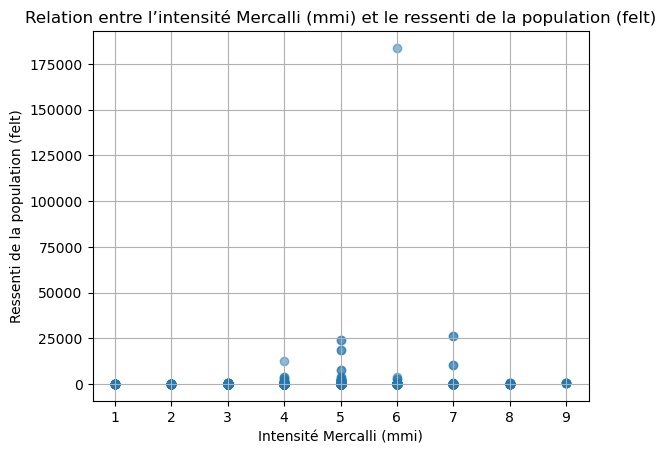

In [45]:
plt.scatter(df['mmi'], df['felt'], alpha=0.5)
plt.title('Relation entre l’intensité Mercalli (mmi) et le ressenti de la population (felt)')
plt.xlabel('Intensité Mercalli (mmi)')
plt.ylabel('Ressenti de la population (felt)')
plt.grid(True)
plt.show()

## Les magnitudes sont-elles plus élevées dans certains fuseaux horaires 

In [46]:
mean_magnitude_per_timezone = df.groupby('timezone')['magnitude'].mean().reset_index(name='mean_magnitude')
mean_magnitude_per_timezone.sort_values(by='mean_magnitude', ascending=False, inplace=True)
print(mean_magnitude_per_timezone)

    timezone  mean_magnitude
16       270        5.876923
9       -180        5.734043
24       540        5.714948
23       480        5.683607
25       600        5.660465
22       420        5.604545
21       390        5.600000
12        60        5.571429
8       -240        5.558824
19       345        5.533333
10      -120        5.500000
17       300        5.400000
11       -60        5.400000
20       360        5.400000
14       180        5.400000
26       720        5.260000
13       120        5.200000
15       210        5.109091
27       780        5.100000
18       330        5.033333
3       -540        4.654167
1       -660        4.183333
0       -720        4.078571
6       -360        4.018765
7       -300        4.003084
4       -480        3.788000
5       -420        3.736596
2       -600        3.680000


## Les événements signalés par plus de stations (nst) ont-ils des magnitudes plus précises 

0.6668890900349981


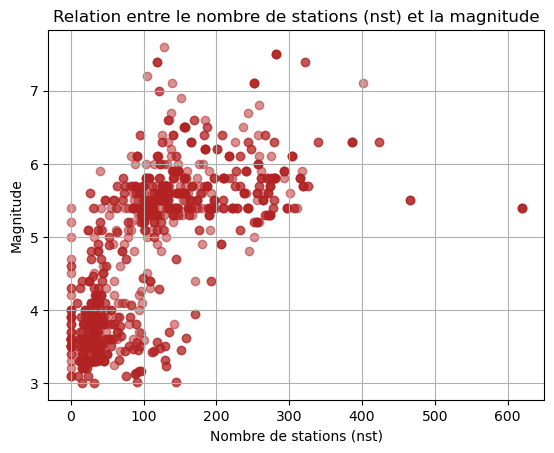

In [47]:
correlation_nst_magnitude = df['nst'].corr(df['magnitude'])
print(correlation_nst_magnitude)
plt.scatter(df['nst'], df['magnitude'], alpha=0.5,color='firebrick')
plt.title('Relation entre le nombre de stations (nst) et la magnitude')
plt.xlabel('Nombre de stations (nst)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


## Les alertes rouges sont-elles associées à des tsunamis 

In [48]:
rouge_alerts_est_tsunami = df[(df['alert'] == 'red') & (df['tsunami'] == 1)].shape[0]
total_rouge_alerts = df[df['alert'] == 'red'].shape[0]

print("Nombre d'alertes rouges associées à des tsunamis :", rouge_alerts_est_tsunami)
print("Nombre total d'alertes rouges :", total_rouge_alerts)

Nombre d'alertes rouges associées à des tsunamis : 4
Nombre total d'alertes rouges : 9


## Les événements avec une grande distance station-épicentre (dmin) ont-ils des magnitudes plus faibles 

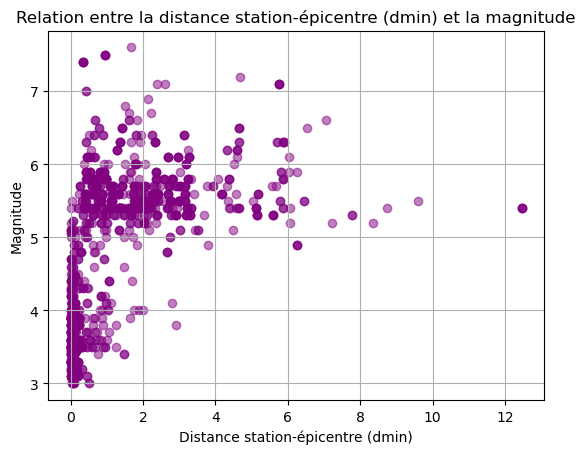

In [49]:
plt.scatter(df['dmin'], df['magnitude'], alpha=0.5, color='purple')
plt.title('Relation entre la distance station-épicentre (dmin) et la magnitude')
plt.xlabel('Distance station-épicentre (dmin)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

## Existe-t-il une corrélation entre la couverture angulaire (gap) et la profondeur 

In [50]:
correlation_gap_depth = df['gap'].corr(df['depth'])
correlation_gap_depth

-0.14358811377836192

## Quels sont les types d’événements les plus fréquents dans chaque continent 

In [51]:
most_frequent_event_types = df.groupby(['continent', 'type']).size().reset_index(name='count')
most_frequent_event_types = most_frequent_event_types.loc[most_frequent_event_types.groupby('continent')['count'].idxmax()]
most_frequent_event_types

,continent,type,count
0,Africa,earthquake,3
1,Asia,earthquake,333
2,Europe,earthquake,7
3,Insluar Oceania,earthquake,1
4,Insular Oceania,earthquake,1
5,North America,earthquake,446
6,Oceania,earthquake,1
7,South America,earthquake,75


## Les magnitudes les plus élevées se trouvent-elles dans des profondeurs spécifiques 

C:\Users\hp\AppData\Local\Temp\ipykernel_12688\265708053.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  depth_magnitude_mean = df.groupby(depth_bins)['magnitude'].mean()


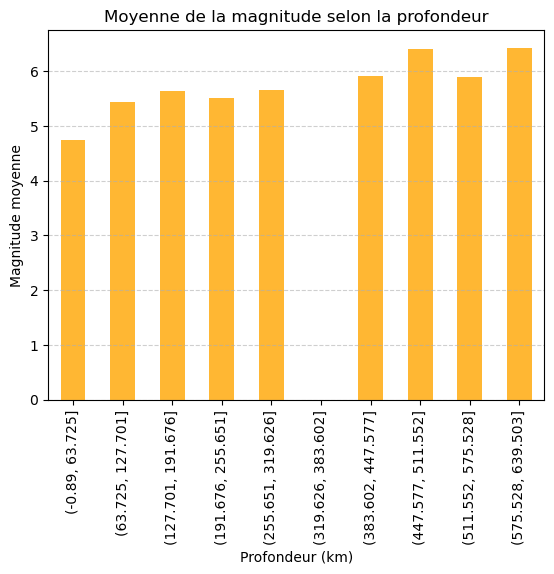

In [52]:
depth_bins = pd.cut(df['depth'], bins=10)
depth_magnitude_mean = df.groupby(depth_bins)['magnitude'].mean()
depth_magnitude_mean.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Moyenne de la magnitude selon la profondeur')
plt.xlabel('Profondeur (km)')
plt.ylabel('Magnitude moyenne')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


## Les événements de courte profondeur provoquent-ils plus de ressentis par la population 

In [53]:
events_felt = df[df['felt'] > 0]
events_not_felt = df[df['felt'] == 0]

mean_depth_felt = events_felt['depth'].mean()
mean_depth_not_felt = events_not_felt['depth'].mean()

print("La profondeur moyenne des événements ressentis par la population est de ",mean_depth_felt)
print("La profondeur moyenne des événements non ressentis par la population est de ",mean_depth_not_felt)

La profondeur moyenne des événements ressentis par la population est de  47.70149231770833
La profondeur moyenne des événements non ressentis par la population est de  27.937434959349595


## Les alertes jaunes sont-elles plus fréquentes dans certains continents 

In [54]:
yellow_alerts_by_continent = df[df['alert'] == 'yellow'].groupby('continent').size().reset_index(name='count')
yellow_alerts_by_continent

,continent,count
0,Asia,33
1,North America,1
2,South America,4


## 11.	Les distances des stations influencent-elles la précision des données (via rms)

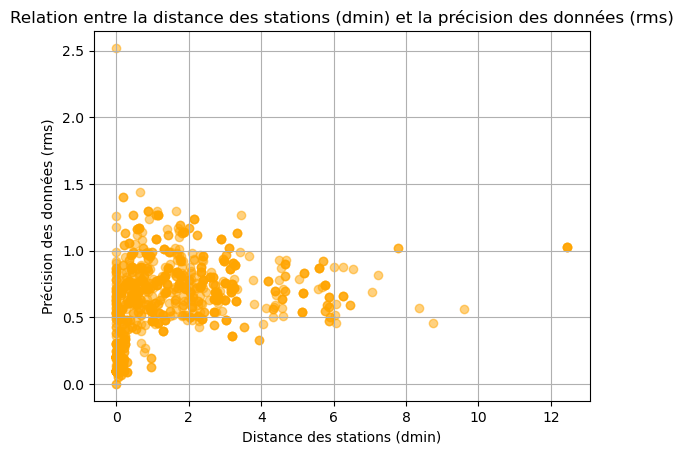

In [55]:
plt.scatter(df['dmin'], df['rms'], alpha=0.5, color='orange')
plt.title('Relation entre la distance des stations (dmin) et la précision des données (rms)')
plt.xlabel('Distance des stations (dmin)')
plt.ylabel('Précision des données (rms)')
plt.grid(True)
plt.show()

## Les événements ayant un sig élevé provoquent-ils des alertes plus critiques 

In [56]:
mean_sig_per_alert = df.groupby('alert')['sig'].mean().reset_index()
mean_sig_per_alert

,alert,sig
0,green,493.534459
1,orange,1015.666667
2,red,2269.777778
3,yellow,800.394737


## Existe-t-il des schémas saisonniers pour les événements 

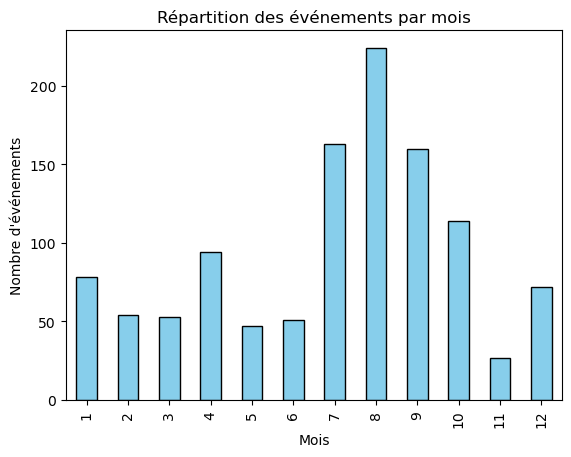

In [57]:
df['month'] = pd.to_datetime(df['date']).dt.month
df['month'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Répartition des événements par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre d\'événements')
plt.show()

# Les événements avec de grandes magnitudes se produisent-ils plus souvent dans des régions précises ?


In [58]:
mean_magnitude_per_region = df.groupby('place')['magnitude'].mean().reset_index(name='mean_magnitude')
mean_magnitude_per_region.sort_values(by='mean_magnitude', ascending=False, inplace=True)
print(mean_magnitude_per_region)

                                        place  mean_magnitude
138             19 km E of Gamut, Philippines            7.60
160     2024 Noto Peninsula, Japan Earthquake            7.50
307  41 km ESE of San Pedro de Atacama, Chile            7.40
82            15 km S of Hualien City, Taiwan            7.40
9                 10 km WSW of Atiquipa, Peru            7.20
..                                        ...             ...
10               10 km WSW of Susitna, Alaska            3.10
243               3 km ENE of The Geysers, CA            3.09
244                    3 km SE of Yucaipa, CA            3.01
81                   15 km S of Camarillo, CA            3.01
98             16 km ENE of Goldfield, Nevada            3.00

[518 rows x 2 columns]


# Les tsunamis sont-ils associés à des magnitudes spécifiques ?


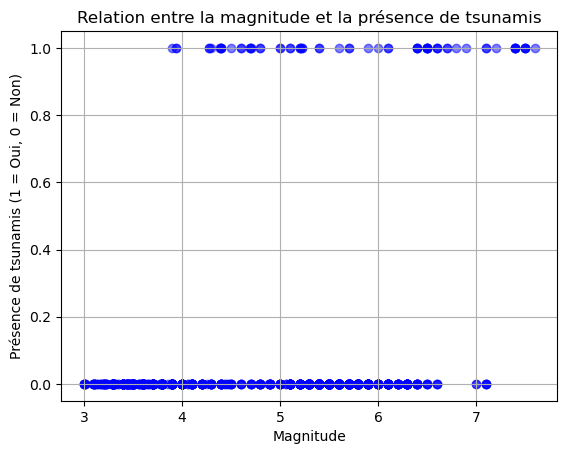

In [59]:
plt.scatter(df['magnitude'], df['tsunami'], alpha=0.5, color='blue')
plt.title('Relation entre la magnitude et la présence de tsunamis')
plt.xlabel('Magnitude')
plt.ylabel('Présence de tsunamis (1 = Oui, 0 = Non)')
plt.grid(True)
plt.show()

# Les régions proches des failles tectoniques enregistrent-elles des magnitudes plus fréquentes ?


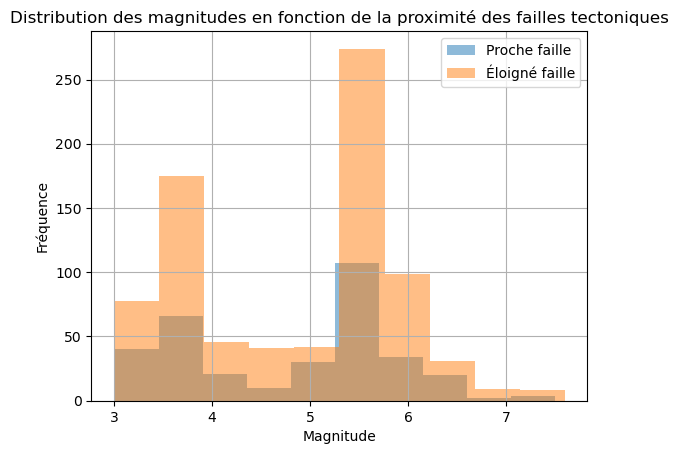

In [60]:
np.random.seed(0)
df['proche_faille'] = np.random.choice([0, 1], size=len(df), p=[0.7, 0.3])

magnitude_proche_faille = df[df['proche_faille'] == 1]['magnitude']
magnitude_eloigne_faille = df[df['proche_faille'] == 0]['magnitude']

plt.hist(magnitude_proche_faille, bins=10, alpha=0.5, label='Proche faille')
plt.hist(magnitude_eloigne_faille, bins=10, alpha=0.5, label='Éloigné faille')
plt.xlabel('Magnitude')
plt.ylabel('Fréquence')
plt.title('Distribution des magnitudes en fonction de la proximité des failles tectoniques')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Les pays proches de l’équateur enregistrent-ils des magnitudes différentes ?

In [61]:
equator_events = df[(df['latitude'] >= -10) & (df['latitude'] <= 10)]
other_events = df[(df['latitude'] < -10) | (df['latitude'] > 10)]

mean_magnitude_equator = equator_events['magnitude'].mean()
mean_magnitude_other = other_events['magnitude'].mean()

print(f'La magnitude moyenne des événements proches de l\'équateur est de {mean_magnitude_equator}')
print(f'La magnitude moyenne des événements dans les autres régions est de {mean_magnitude_other}')

La magnitude moyenne des événements proches de l'équateur est de 5.673949579831933
La magnitude moyenne des événements dans les autres régions est de 4.761139489194499


# Quelle est la relation entre la latitude et la profondeur ?


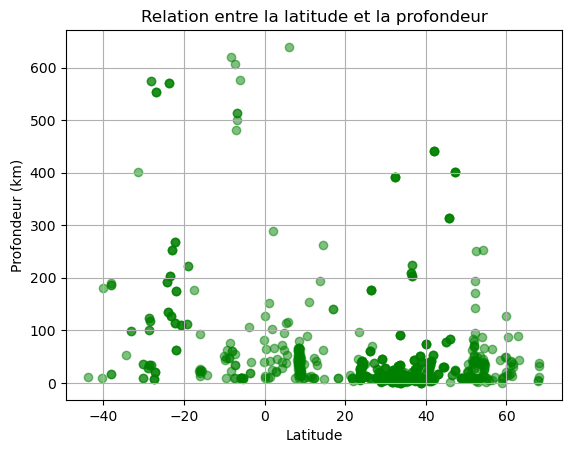

In [62]:
plt.scatter(df['latitude'], df['depth'], alpha=0.5, color='green')
plt.title('Relation entre la latitude et la profondeur')
plt.xlabel('Latitude')
plt.ylabel('Profondeur (km)')
plt.grid(True)
plt.show()

# Les événements dans certains fuseaux horaires ont-ils des magnitudes supérieures à 6 ?


In [63]:
events_magnitude_gt_6 = df[df['magnitude'] > 6]
events_magnitude_gt_6_by_timezone = events_magnitude_gt_6['timezone'].value_counts()
print(events_magnitude_gt_6_by_timezone)

timezone
 480    30
 540    29
 270    11
-180    11
 600     7
-300     5
 420     4
-240     3
-360     3
-540     2
-420     2
Name: count, dtype: int64


# Existe-t-il une relation entre les magnitudes élevées et le type d’alerte ?


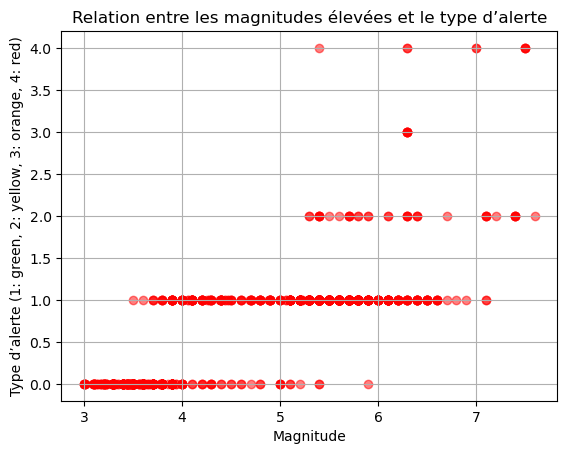

In [64]:
plt.scatter(df['magnitude'], df['alert'].apply(lambda x: {'green': 1, 'yellow': 2, 'orange': 3, 'red': 4}.get(x, 0)), alpha=0.5, color='red')
plt.title('Relation entre les magnitudes élevées et le type d’alerte')
plt.xlabel('Magnitude')
plt.ylabel('Type d’alerte (1: green, 2: yellow, 3: orange, 4: red)')
plt.grid(True)
plt.show()

# Les continents avec les magnitudes moyennes les plus élevées ont-ils aussi les intensités Mercalli les plus élevées ?


         continent  mean_magnitude
7    South America        5.804000
1             Asia        5.689189
2           Europe        5.571429
6          Oceania        5.500000
0           Africa        5.366667
3  Insluar Oceania        5.100000
4  Insular Oceania        4.900000
5    North America        3.825964
         continent  mean_mmi
6          Oceania  7.000000
0           Africa  6.000000
3  Insluar Oceania  6.000000
1             Asia  5.579580
2           Europe  5.571429
7    South America  4.106667
5    North America  4.049327
4  Insular Oceania  3.000000


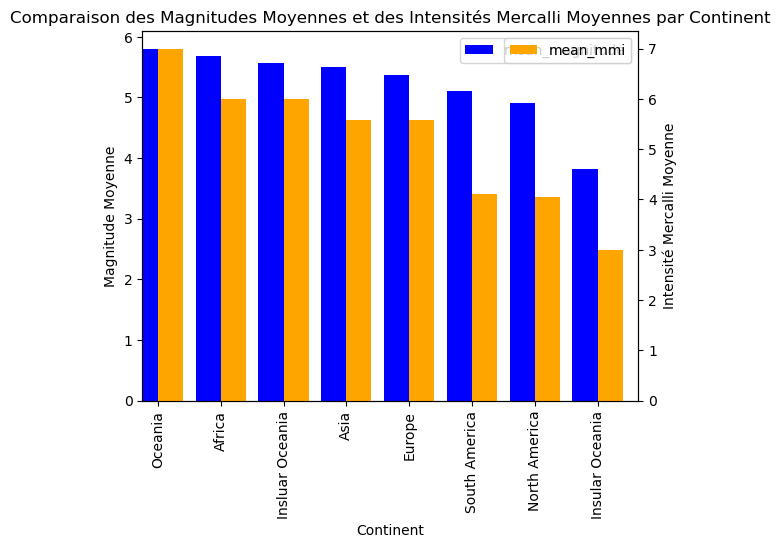

In [65]:
# Calculer l'intensité Mercalli moyenne par continent
mean_mmi_per_continent = df.groupby('continent')['mmi'].mean().reset_index(name='mean_mmi')
mean_mmi_per_continent.sort_values(by='mean_mmi', ascending=False, inplace=True)

# Afficher les résultats
print(mean_magnitude_per_continent)
print(mean_mmi_per_continent)

# Tracer les résultats pour visualiser la comparaison
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
mean_magnitude_per_continent.plot(kind='bar', x='continent', y='mean_magnitude', ax=ax1, color='blue', position=1, width=0.4)
mean_mmi_per_continent.plot(kind='bar', x='continent', y='mean_mmi', ax=ax2, color='orange', position=0, width=0.4)

ax1.set_ylabel('Magnitude Moyenne')
ax2.set_ylabel('Intensité Mercalli Moyenne')
ax1.set_title('Comparaison des Magnitudes Moyennes et des Intensités Mercalli Moyennes par Continent')
ax1.set_xlabel('Continent')

plt.show()

# Les magnitudes supérieures à 7 sont-elles associées à des distances station-épicentre plus grandes ?


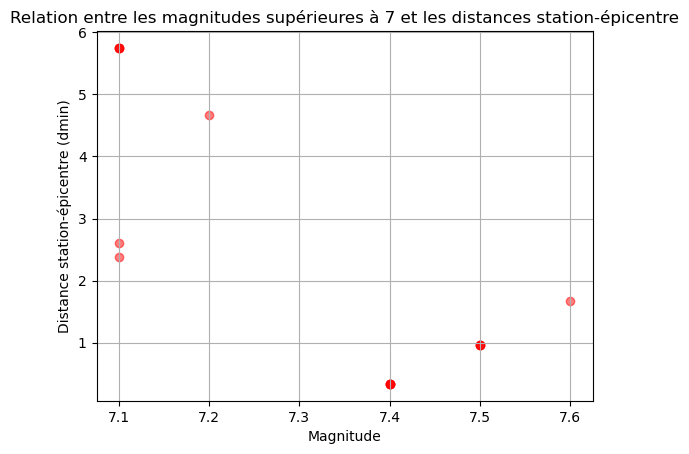

In [66]:
events_magnitude_gt_7 = df[df['magnitude'] > 7]
plt.scatter(events_magnitude_gt_7['magnitude'], events_magnitude_gt_7['dmin'], alpha=0.5, color='red')
plt.title('Relation entre les magnitudes supérieures à 7 et les distances station-épicentre')
plt.xlabel('Magnitude')
plt.ylabel('Distance station-épicentre (dmin)')
plt.grid(True)
plt.show()